In [1]:
import numpy as np
import pandas as pd

In [37]:
import collections
import matplotlib.pyplot as plt 

# set this so the graphs open internally
%matplotlib inline
import seaborn as sns

In [13]:
covid = pd.read_csv('COVID-19 Cases.csv')
covid.head()

C:\Users\Akshara\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime
0,Confirmed,NaN,0,0,2/3/2020,Switzerland,Switzerland,NaN,NaN,CH,CHE,NaN,46.8182,8.2275,8654618.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
1,Deaths,NaN,0,0,3/1/2020,Cyprus,Cyprus,NaN,NaN,CY,CYP,NaN,35.1264,33.4299,1207361.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
2,Confirmed,NaN,23,0,4/21/2020,Antigua and Barbuda,Antigua and Barbuda,NaN,NaN,AG,ATG,NaN,17.0608,-61.7964,97928.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
3,Deaths,NaN,0,0,2/11/2020,Jamaica,Jamaica,NaN,NaN,JM,JAM,NaN,18.1096,-77.2975,2961161.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
4,Confirmed,NaN,0,0,2/6/2020,Belize,Belize,NaN,NaN,BZ,BLZ,NaN,17.1899,-88.4976,397621.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM


In [14]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718080 entries, 0 to 718079
Data columns (total 18 columns):
Case_Type                               718080 non-null object
People_Total_Tested_Count               2352 non-null float64
Cases                                   718080 non-null int64
Difference                              718080 non-null int64
Date                                    718080 non-null object
Combined_Key                            718080 non-null object
Country_Region                          718080 non-null object
Province_State                          680952 non-null object
Admin2                                  663816 non-null object
iso2                                    717672 non-null object
iso3                                    717876 non-null object
FIPS                                    641988 non-null float64
Lat                                     696660 non-null float64
Long                                    696660 non-null float64
Populat

In [15]:
covid.describe()

,People_Total_Tested_Count,Cases,Difference,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count
count,2352.000000,718080.000000,718080.000000,641988.000000,696660.000000,696660.000000,6.966600e+05,2352.000000
mean,81998.648810,119.219155,5.112238,30335.484906,37.126733,-83.343770,2.261694e+06,2043.231293
std,120057.136946,2786.694174,111.799217,15196.100174,9.706925,38.826489,2.661671e+07,7524.910914
min,3.000000,0.000000,-10034.000000,60.000000,-51.796300,-170.132000,8.600000e+01,0.000000
25%,17375.000000,0.000000,0.000000,18169.000000,34.068548,-97.698949,1.202300e+04,45.000000
50%,44501.000000,0.000000,0.000000,29171.000000,38.159655,-89.201401,2.970900e+04,402.000000
75%,93964.750000,0.000000,0.000000,45079.000000,41.772338,-81.923085,9.794700e+04,1412.000000
max,959071.000000,216582.000000,26843.000000,56045.000000,71.706900,178.065000,1.380004e+09,67890.000000


In [16]:
#check missing values
covid.isnull().sum().sort_values(ascending=False)

People_Hospitalized_Cumulative_Count    715728
People_Total_Tested_Count               715728
FIPS                                     76092
Admin2                                   54264
Province_State                           37128
Population_Count                         21420
Long                                     21420
Lat                                      21420
iso2                                       408
iso3                                       204
Date                                         0
Cases                                        0
Difference                                   0
Prep_Flow_Runtime                            0
Combined_Key                                 0
Country_Region                               0
Data_Source                                  0
Case_Type                                    0
dtype: int64

In [34]:
#COVID count based on case type
case = covid.groupby(['Case_Type']).count()
case.Cases 

Case_Type
Confirmed    359040
Deaths       359040
Name: Cases, dtype: int64

In [31]:
#COVID count based on country
country = covid.groupby(['Country_Region']).sum()
country.Cases

Country_Region
Afghanistan                  34295
Albania                      20316
Algeria                      93207
Andorra                      24428
Angola                         784
Antigua and Barbuda            796
Argentina                    97420
Armenia                      45636
Australia                   240125
Austria                     546626
Azerbaijan                   41545
Bahamas                       2098
Bahrain                      63309
Bangladesh                   90404
Barbados                      2624
Belarus                     182582
Belgium                    1332474
Belize                         515
Benin                         1455
Bhutan                         227
Bolivia                      18870
Bosnia and Herzegovina       41318
Botswana                       523
Brazil                     1355660
Brunei                        6089
Bulgaria                     33837
Burkina Faso                 19527
Burma                         2888
Burun

In [39]:
#COVID cases count by province
province = covid.groupby(['Province_State']).sum()
province.Cases

Province_State
Alabama                              149385
Alaska                                 9961
Alberta                               94652
American Samoa                            0
Anguilla                                103
Anhui                                 87762
Arizona                              157590
Arkansas                              64275
Aruba                                  3207
Australian Capital Territory           3900
Beijing                               45042
Bermuda                                2671
Bonaire, Sint Eustatius and Saba        113
British Columbia                      63111
British Virgin Islands                  156
California                          1048351
Cayman Islands                         1920
Channel Islands                       15306
Chongqing                             52312
Colorado                             322455
Connecticut                          573645
Curacao                                 583
Delaware         

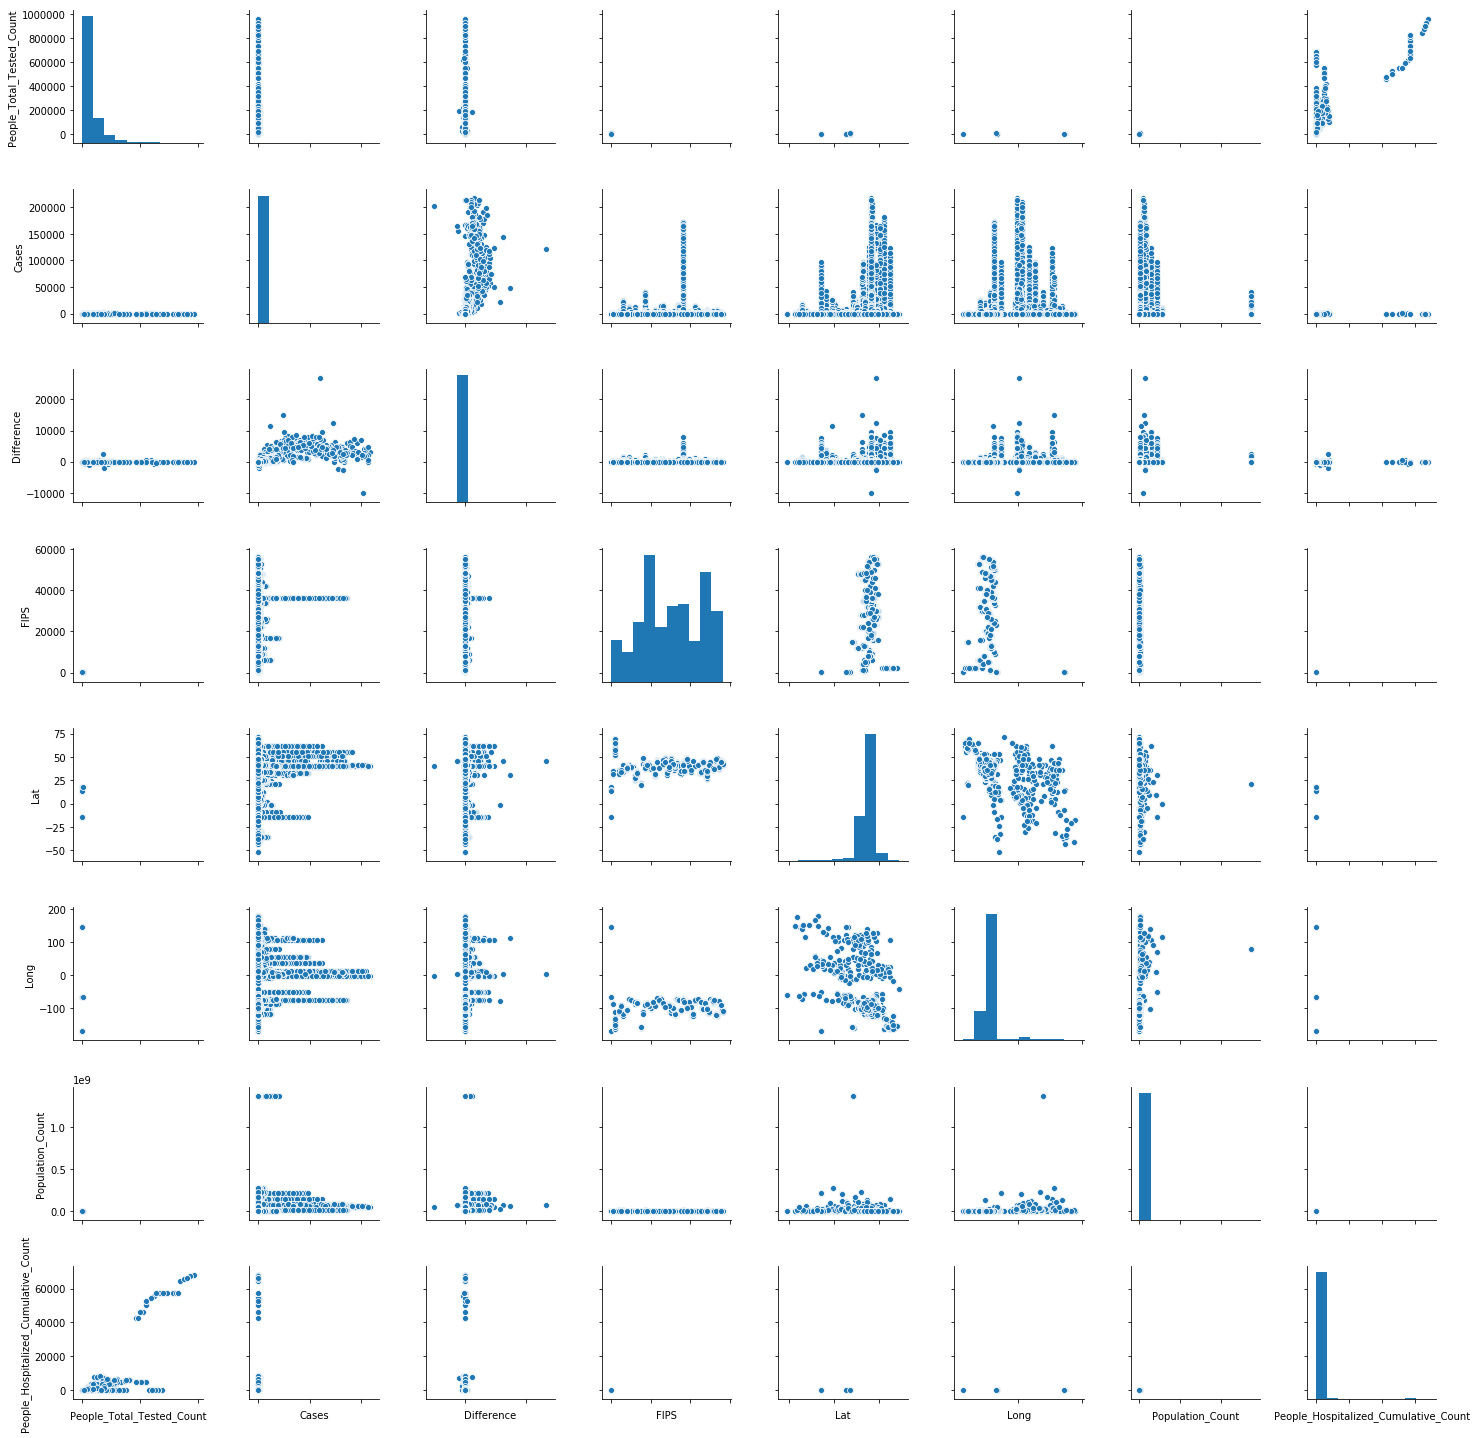

In [45]:
g = sns.pairplot(covid)
g.set(xticklabels = [])